In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

# Análise do Dataset Simplified Coffee

Este dataset contém informações sobre diferentes cafés e suas avaliações. A seguir, apresento a descrição das colunas e algumas hipóteses que podem ser levantadas para análise.

## Descrição das Colunas

1. **Name**: Nome do café.
   - Tipo de dado: Categórico (Nominal)
   - Descrição: O nome do café, que pode ser uma marca ou uma descrição do tipo de 
     produto.

2. **Roaster**: Nome do torrefador.
   - Tipo de dado: Categórico (Nominal)
   - Descrição: Refere-se à empresa ou marca responsável pela torrefa
     ção do café.

3. **Roast**: Tipo de torra do café (Exemplo: Light, Medium, Dark).
   - Tipo de dado: Categórico (Nominal)
   - Descrição: Indica o grau de torra do café. Pode influenciar o sabor e a inte
     nsidade do café.

4. **Loc_Country**: País de localização do torrefador ou da empresa.
   - Tipo de dado: Categórico (Nominal)
   - Descrição: País onde
      o café foi torrado.

5. **Origin**: País ou região de origem dos grãos de café.
   - Tipo de dado: Categórico (Nominal)
   - Descrição: Indica o local de cultivo dos grãos de café, como Brasil,
      Colômbia, Etiópia, etc.

6. **100g_USD**: Preço do café por 100g em dólares americanos.
   - Tipo de dado: Numérico (Contínuo)
   - Descrição: O preço do café
      por 100 gramas, em dólares.

7. **Rating**: Classificação do café
   - Tipo de dado: Numérico (Contínuo)
   - Descrição: A nota média dada pelos consumidores ao café, ref
     letindo sua qualidade percebida.

8. **Review_Date**: Data da avaliação.
   - Tipo de dado: Temporal (Data)
   - Descrição: A data em que a avaliação foi feita.

9. **Review**: Texto da avaliação.
   - Tipo de dado: Texto (String)
   - Descrição: Comentários
     offe` e sugerir abordagens para exploração e validação das hipóteses.


In [8]:
# importando os dados
data = pd.read_csv('../data/raw/simplified_coffee.csv')
data.head()

,name,roaster,roast,loc_country,origin,100g_USD,rating,mes,ano,preco_qualidade,idade_cafe,avaliacao_rating,classificacao_preco
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November,2017,0.051087,7,High,barato
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November,2017,0.045543,7,High,barato
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November,2017,0.051596,7,High,barato
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November,2017,0.055269,7,High,barato
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November,2017,0.042688,7,High,barato


In [9]:
data['100g_USD'].max()

132.28

In [10]:
data[data['100g_USD'] == 132.28]

,name,roaster,roast,loc_country,origin,100g_USD,rating,mes,ano,preco_qualidade,idade_cafe,avaliacao_rating,classificacao_preco
943,Mama Cata Mokkita,Paradise Roasters,Medium-Light,United States,Panama,132.28,97,November,2021,1.363711,3,Excellent,caro


## 1. Descrição dos dados

In [11]:
data.describe()

,100g_USD,rating,ano,preco_qualidade,idade_cafe
count,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000
mean,10.479125,93.306581,2020.167737,0.111786,3.832263
std,13.486674,1.479413,1.444542,0.142413,1.444542
min,0.170000,84.000000,2017.000000,0.001809,2.000000
25%,5.260000,93.000000,2019.000000,0.055895,3.000000
50%,6.170000,93.000000,2020.000000,0.065638,4.000000
75%,9.600000,94.000000,2021.000000,0.103226,5.000000
max,132.280000,97.000000,2022.000000,1.363711,7.000000


In [12]:
data.shape

(1246, 13)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1246 non-null   object 
 1   roaster              1246 non-null   object 
 2   roast                1234 non-null   object 
 3   loc_country          1246 non-null   object 
 4   origin               1246 non-null   object 
 5   100g_USD             1246 non-null   float64
 6   rating               1246 non-null   int64  
 7   mes                  1246 non-null   object 
 8   ano                  1246 non-null   int64  
 9   preco_qualidade      1246 non-null   float64
 10  idade_cafe           1246 non-null   int64  
 11  avaliacao_rating     1246 non-null   object 
 12  classificacao_preco  1246 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 126.7+ KB


In [14]:
data.isnull().sum()

name                    0
roaster                 0
roast                  12
loc_country             0
origin                  0
100g_USD                0
rating                  0
mes                     0
ano                     0
preco_qualidade         0
idade_cafe              0
avaliacao_rating        0
classificacao_preco     0
dtype: int64

In [15]:

preco_medio = data['100g_USD'].mean()

# Calcular os percentis (25%, 50%, 75%)
percentil_25 = data['100g_USD'].quantile(0.25)
percentil_50 = data['100g_USD'].median()
percentil_75 = data['100g_USD'].quantile(0.75)

# Identificar o maior valor de preço
preco_maximo = data['100g_USD'].max()

amplitude_rating = data['rating'].max() - data['rating'].min()
iqr_rating = data['rating'].quantile(0.75) - data['rating'].quantile(0.25)

print(f"Preço médio dos grãos de café: USD {preco_medio:.2f}")
print(f"75% dos cafés têm preço até: USD {percentil_75:.2f}")
print(f"Maior valor de café: USD {preco_maximo:.2f} (possível outlier)")
print(f"Amplitude das notas de avaliação: {amplitude_rating}")
print(f"Distância interquartil (IQR) das notas: {iqr_rating:.2f}")


Preço médio dos grãos de café: USD 10.48
75% dos cafés têm preço até: USD 9.60
Maior valor de café: USD 132.28 (possível outlier)
Amplitude das notas de avaliação: 13
Distância interquartil (IQR) das notas: 1.00


In [16]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detectar e remover outliers em variáveis numéricas
outliers_dict = {}
for col in data.select_dtypes(include=[np.number]).columns:
    outliers = detect_outliers_iqr(data, col)
    if not outliers.empty:
        outliers_dict[col] = len(outliers)
        data = data[~data.index.isin(outliers.index)]

In [17]:
data['100g_USD'].max()

11.02

Das duas células acima, podemos ver que o dataset possui 1246 linhas (instâncias) e 9 colunas (features). Podemos ver também que esse dataset tem dados faltantes para o atributo "roast" (torra) e no atributo "desc_3".

O atributo torra possui 12 valores faltantes,  


Conseguimos ver o preço médio dos grãos de café (USD 10,48) e que 75% dos dados possuem valor até USD 9,60 mas o café de maior valor custa USD 132,28, o que pode ser um outlier.    
Em relação às notas das avaliações temos uma amplitude de 13 pontos e a distância inter-quartil (IQR) é de apenas 1 ponto, o que pode mostrar que os cafés tem notas altas que variam pouco, por ter alta qualidade.

In [18]:
# Calculando a porcentagem de dados faltantos
dados_faltantes_roast = data['roast'].isnull().sum()
porcentagem_dados_faltantes = (dados_faltantes_roast / 2095) * 100
porcentagem_dados_faltantes

0.1909307875894988

Ou seja, temos 0.5% de dados faltantes nessa coluna. Por ser um valor baixo, podemos retirar essas linhas.

### Vamos avaliar quais tipos de torra e quais países são produtos do grão.

In [19]:
torras = data['roast'].unique()
torras

array(['Medium-Light', 'Medium', 'Light', 'Medium-Dark', 'Dark', nan],
      dtype=object)

In [20]:
paises = data['origin'].unique()
len(paises)

24

### Features Enginner

* Vamos criar novas variáveis a partir da que temos no nosso dataset

In [21]:
# preço por unidade de qualidade

data['preco_qualidade'] = data['100g_USD']/data['rating']

# idade do café, considerando o ano que estamos

ano = 2024
data['idade_cafe'] = ano - data['ano']

# intervalo de avaliação

bins = [0 , 85, 90, 95, 100]
labels = ['Low', 'Medium', 'High', 'Excellent']
data['avaliacao_rating'] = pd.cut(data['rating'], bins = bins , labels = labels)


#Classificação de preço
data['classificacao_preco'] = pd.qcut(data['100g_USD'], q =3, labels = ['barato', 'intermediario', 'caro'] )

In [22]:
data

,name,roaster,roast,loc_country,origin,100g_USD,rating,mes,ano,preco_qualidade,idade_cafe,avaliacao_rating,classificacao_preco
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November,2017,0.051087,7,High,barato
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November,2017,0.045543,7,High,barato
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November,2017,0.051596,7,High,barato
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November,2017,0.055269,7,High,barato
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November,2017,0.042688,7,High,barato
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,Finca Patzibir,El Gran Cafe,Medium-Light,Guatemala,Guatemala,4.70,92,November,2022,0.051087,2,High,barato
1242,Proyecto Aurora,El Gran Cafe,Medium-Light,Guatemala,Guatemala,2.94,93,November,2022,0.031613,2,High,barato
1243,Finca El Potrero,El Gran Cafe,Medium-Light,Guatemala,Guatemala,2.94,93,November,2022,0.031613,2,High,barato
1244,Chacayá Santiago Atitlán,El Gran Cafe,Medium-Light,Guatemala,Guatemala,4.70,93,November,2022,0.050538,2,High,barato


### Hipóteses e Perguntas Levantadas

### Cafés mais Caros podem ser Avaliados de Forma mais Positiva?

Pela análise gráfica, sugere que o preço do café está fortemente ligado à sua qualidade percebida, ou seja, em geral a qualidade do café, medida pela nota, está positivamente relacionada ao seu preço. Consumidores que buscam cafés de alta qualidade estão dispostos a pagar mais por eles.

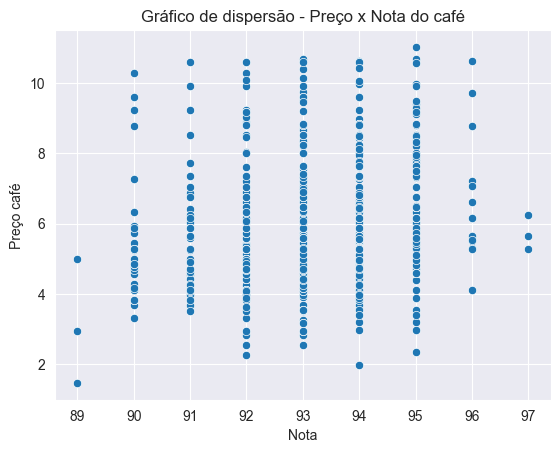

In [33]:
ax = sns.scatterplot(data=data, x='rating', y='100g_USD')
plt.title("Gráfico de dispersão - Preço x Nota do café")
ax.set_xlabel('Nota')
ax.set_ylabel('Preço café')
plt.savefig("Cafés_caros_avaliados.png")
plt.show()

### Influência do Local de Venda no Preço do Café

Esse gráfico já pode sugerir que o preço pode estar relacionado com o local da venda, uma vez que os grãos mais caros estão em países mais desenvolvidos e não produtores de café (Taiwan, Estados Unidos, Inglaterra)

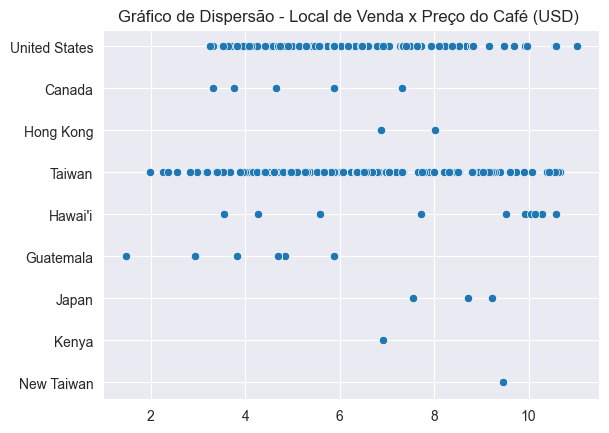

In [34]:
ax = sns.scatterplot(data=data, y='loc_country', x='100g_USD')
plt.title("Gráfico de Dispersão - Local de Venda x Preço do Café (USD) ")
ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig("Influência_local_venda.png")
plt.show()

In [25]:
data

,name,roaster,roast,loc_country,origin,100g_USD,rating,mes,ano,preco_qualidade,idade_cafe,avaliacao_rating,classificacao_preco
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November,2017,0.051087,7,High,barato
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November,2017,0.045543,7,High,barato
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November,2017,0.051596,7,High,barato
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November,2017,0.055269,7,High,barato
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November,2017,0.042688,7,High,barato
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,Finca Patzibir,El Gran Cafe,Medium-Light,Guatemala,Guatemala,4.70,92,November,2022,0.051087,2,High,barato
1242,Proyecto Aurora,El Gran Cafe,Medium-Light,Guatemala,Guatemala,2.94,93,November,2022,0.031613,2,High,barato
1243,Finca El Potrero,El Gran Cafe,Medium-Light,Guatemala,Guatemala,2.94,93,November,2022,0.031613,2,High,barato
1244,Chacayá Santiago Atitlán,El Gran Cafe,Medium-Light,Guatemala,Guatemala,4.70,93,November,2022,0.050538,2,High,barato


### O valor do café apresenta uma tendência de crescimento?

O gráfico apresenta a evolução do valor do café entre 2017 e 2022, destacando um crescimento moderado até 2019, seguido por um aumento acentuado a partir de 2020. Essa tendência pode estar relacionada a fatores como aumento da demanda global, restrições na oferta ou impacto de eventos externos, como crises econômicas ou climáticas, que influenciaram o mercado nesse período.

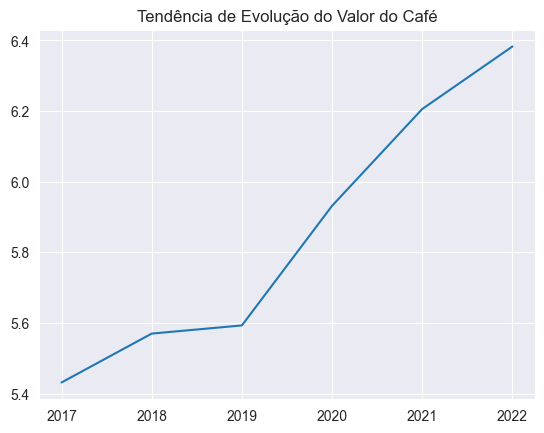

In [35]:
# calcular a média de '100g_USD' por ano
media_por_ano = data.groupby('ano')['100g_USD'].mean()
plt.plot(media_por_ano.index, media_por_ano.values)
plt.title('Tendência de Evolução do Valor do Café')
plt.savefig("valor_cafe_tendencia_crescimento.png")
plt.show()

### A média das notas apresenta um crescimento consistente ao passar do tempo?

O gráfico apresenta a média de mudança na nota ao longo do tempo, mostrando uma leve estabilidade entre 2017 e 2018, seguida por um aumento significativo a partir de 2019, que continua até 2022. Isso indica uma melhoria consistente na média das notas ao longo dos anos, possivelmente relacionada a mudanças nos critérios de avaliação, melhorias nos processos ou aumento de desempenho geral.

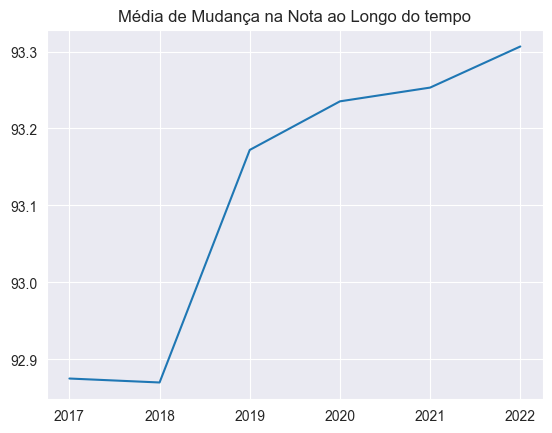

In [36]:
media_por_ano = data.groupby('ano')['rating'].mean()
plt.plot(media_por_ano.index, media_por_ano.values)
plt.title('Média de Mudança na Nota ao Longo do tempo')
plt.savefig("media_notas_crescimento_consistente.png")
plt.show()

 Agora, vamos ver quantos países produtores distintos a base possui e em quantos países esses vendedores estão localizados. Depois vamos repetir as análises para os cafés mais caros.

In [28]:
paises_produtores = data['origin'].nunique()
paises_vendedores = data['loc_country'].nunique()

print(f"Existem {paises_produtores} países produtores")
print(f"Existem {paises_vendedores} países que vendem esses cafés")

# Listar os países produtores e vendedores de café
print("\nPaíses produtores:", data['origin'].unique())
print("\nPaíses vendedores:", data['loc_country'].unique())

Existem 24 países produtores
Existem 9 países que vendem esses cafés

Países produtores: ['Ethiopia' 'Kenya' 'Guatemala' 'Colombia' 'Nicaragua' 'Indonesia' 'Peru'
 'Rwanda' 'Nepal' 'Costa Rica' 'Ecuador' 'Brazil'
 'Democratic Republic Of The Congo' 'Burundi' 'El Salvador' "Hawai'I"
 'Panama' 'Bolivia' 'Mexico' 'Dominican Republic' 'Honduras' 'Thailand'
 'Uganda' 'Yemen']

Países vendedores: ['United States' 'Canada' 'Hong Kong' 'Taiwan' "Hawai'i" 'Guatemala'
 'Japan' 'Kenya' 'New Taiwan']


O gráfico apresenta os 10 principais países produtores de café, classificados pela nota média de seus grãos. A Tanzânia lidera o ranking, seguida de perto pelo Panamá e Equador. Quênia e Iêmen completam a lista dos cinco primeiros. A alta classificação desses países indica uma qualidade excepcional em seus cafés, resultado de fatores como clima, variedade de grãos e processos de produção

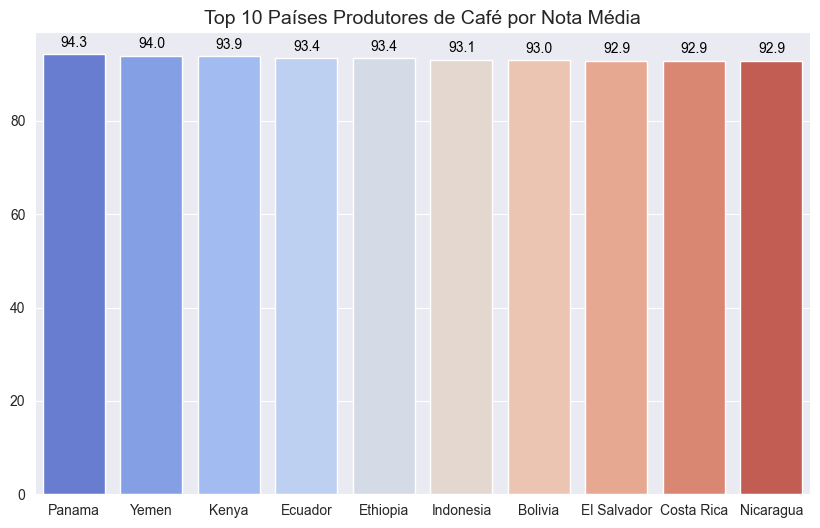

In [53]:
media_notas = data.groupby('origin')['rating'].mean()
top_10_paises = media_notas.nlargest(10)

plt.figure(figsize = (10, 6))

ax = sns.barplot(x = top_10_paises.index, y = top_10_paises.values, palette = "coolwarm")

# Adicionando os valores das médias nas barras
for i, valor in enumerate(top_10_paises.values):
    ax.text(i, valor + 1, f"{valor:.1f}", ha = "center", va= "bottom", fontsize = 10, color = "black")

plt.title("Top 10 Países Produtores de Café por Nota Média", fontsize = 14)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation = 360)
plt.show()

### Influência da idade do café na avaliação de qualidade (rating)


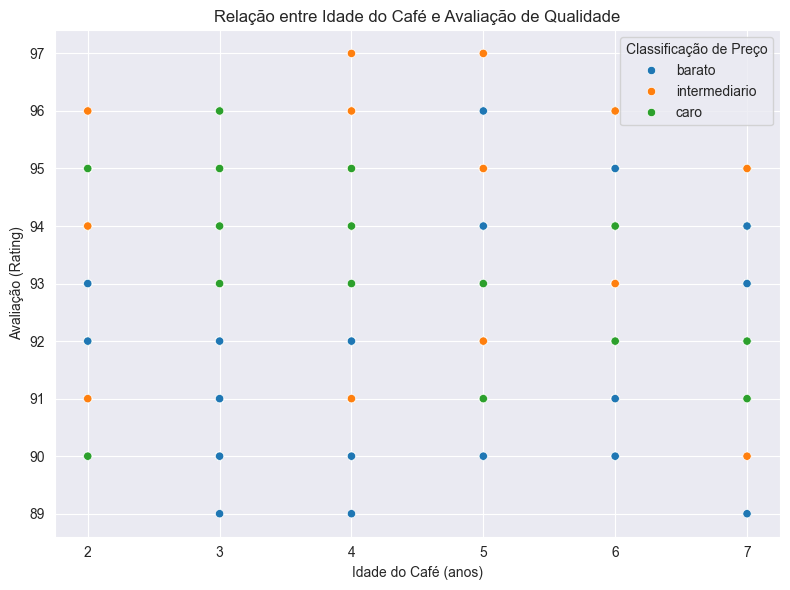

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="idade_cafe", y="rating", hue="classificacao_preco")
plt.title("Relação entre Idade do Café e Avaliação de Qualidade")
plt.xlabel("Idade do Café (anos)")
plt.ylabel("Avaliação (Rating)")
plt.legend(title="Classificação de Preço")
plt.savefig("influencia_idadde_cade_qualidade.png")
plt.tight_layout()
plt.show()


### Relação entre preço e avaliação de qualidade

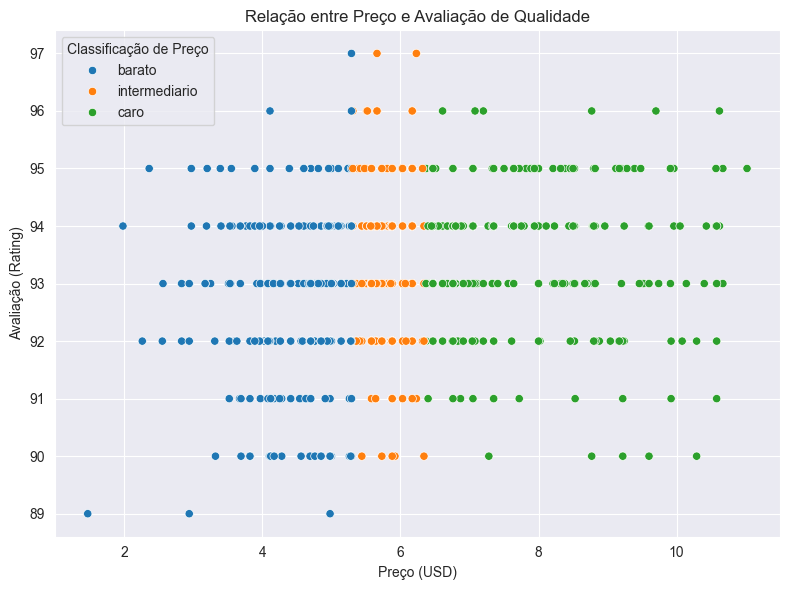

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="100g_USD", y="rating", hue="classificacao_preco")
plt.title("Relação entre Preço e Avaliação de Qualidade")
plt.xlabel("Preço (USD)")
plt.ylabel("Avaliação (Rating)")
plt.legend(title="Classificação de Preço")
plt.tight_layout()
plt.savefig("relacao_preco_avaliacao_qualidade.png")
plt.show()

### Existe uma relação entre o tipo de torra e o preço médio do café?

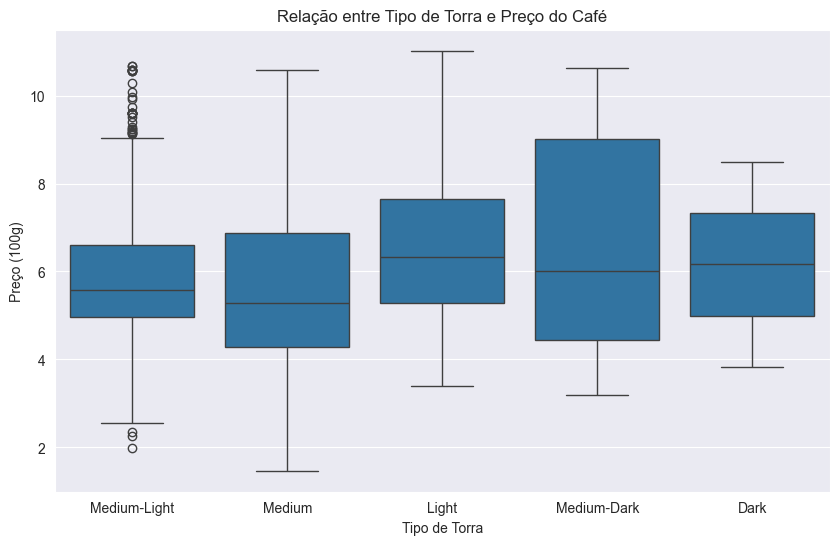

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='roast', y='100g_USD')
plt.title('Relação entre Tipo de Torra e Preço do Café')
plt.xlabel('Tipo de Torra')
plt.ylabel('Preço (100g)')
plt.savefig("existe_relação_entre_tipo_torra_preco_medio.png")
plt.show()


In [ ]:
#data.to_csv("../data/raw/simplified_coffee.csv", index=False)

## 3. Insights

### 1. Associação entre Preços Mais Altos e Avaliações Mais Positivas

Existe uma possibilidade de que cafés com preços mais elevados recebam avaliações mais positivas. Isso pode indicar que consumidores associam preços mais altos à maior qualidade do produto. Essa percepção pode ser influenciada por fatores como:

     Qualidade dos Grãos: Cafés mais caros frequentemente utilizam grãos de origem única ou de cultivos sustentáveis, que tendem a oferecer sabores mais complexos e aromáticos.

     Processo de Torrefação: Métodos de torrefação mais artesanais e cuidadosos podem resultar em um produto final superior, justificando preços mais elevados.

     Experiência do Consumidor: Consumidores dispostos a pagar mais podem esperar uma experiência de consumo diferenciada, influenciando suas avaliações positivas.


### 2. Impacto do Local de Venda ou Torrefação no Preço

O local onde o café é vendido ou torrado pode ter um impacto significativo no preço final do produto. Isso reflete:

     Custos Operacionais: Regiões diferentes possuem custos variáveis de operação, como aluguel, mão de obra e transporte, que podem influenciar o preço do café.

     Preferências Regionais: As preferências de sabor e qualidade podem variar de uma região para outra, afetando a demanda e, consequentemente, os preços.

     Logística e Distribuição: A proximidade com centros de produção ou consumo pode reduzir custos de logística, permitindo preços mais competitivos.


### 3. Melhoria da Qualidade dos Cafés ao Longo dos Anos

A análise sugere que a qualidade dos cafés tem melhorado ao longo do tempo, possivelmente devido a:

     Aprimoramento das Práticas de Cultivo: Técnicas agrícolas mais avançadas e sustentáveis contribuem para a produção de grãos de melhor qualidade.

     Inovação na Torrefação: Investimentos em tecnologia e processos de torrefação mais precisos resultam em perfis de sabor mais refinados.

     Educação e Treinamento: Aumento do conhecimento dos produtores e torrefadores sobre as melhores práticas, promovendo uma maior consistência e excelência no produto final.






